**Importing Libraries**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score , accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split


**Loading dataset**

In [3]:
data = pd.read_csv('/content/Data/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Exploring Dataset**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [6]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


**Splitting Data**

In [9]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
x = data.drop(['Unnamed: 0' , 'Sales'] , axis=1)

In [11]:
y=data['Sales']
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.2 , random_state=42)

**Loading Models**

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "XGBoost": XGBRegressor(n_estimators=100)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.4f} | R2: {r2:.4f}")


Linear Regression - RMSE: 1.7816 | R2: 0.8994
Ridge Regression - RMSE: 1.7816 | R2: 0.8994
Lasso Regression - RMSE: 1.7806 | R2: 0.8996
Random Forest - RMSE: 0.7302 | R2: 0.9831
XGBoost - RMSE: 0.9322 | R2: 0.9725


**Best Model**

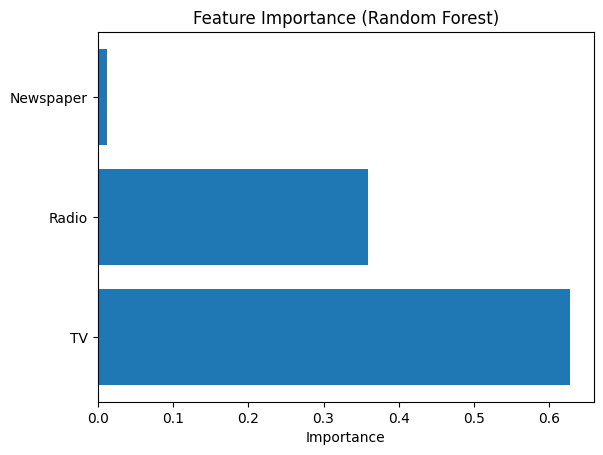

In [19]:
feature_importance = models['Random Forest'].feature_importances_
features = x.columns

plt.barh(features, feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()

In [20]:
y_pred = models['Random Forest'].predict(x_test)
y_pred

array([17.744, 21.854, 20.614,  6.663, 23.181, 13.129, 22.578,  9.702,
       11.899, 15.396,  7.556,  9.049, 12.122,  4.93 , 10.46 , 12.541,
        6.41 , 16.502, 11.299, 19.629, 20.083, 12.863, 10.338, 21.915,
       10.058,  9.025, 22.479, 12.52 , 10.26 ,  5.266, 11.51 , 10.912,
       22.311,  8.362, 15.389, 20.435, 12.169, 20.843, 12.205,  7.631])

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.7302
MAE: 0.6079
R² Score: 0.9831


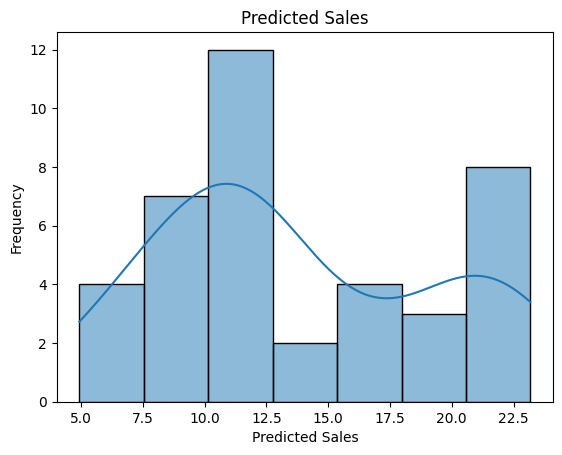

In [28]:
sns.histplot(y_pred , kde=True)
plt.title("Predicted Sales")
plt.xlabel("Predicted Sales")
plt.ylabel("Frequency")
plt.show()

**Actual Vs Predicted Sles**

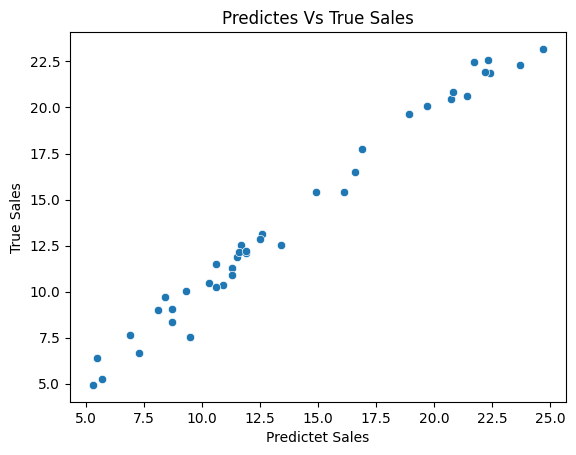

In [29]:
sns.scatterplot(x =y_test  , y=y_pred)
plt.title("Predictes Vs True Sales")
plt.xlabel("Predictet Sales")
plt.ylabel("True Sales")
plt.show()